## 6. 심화된 CNN 구조

### 6-2. Inception Module (Naïve Version) “GoogLeNet”

- Naïve Inception module from scratch

In [1]:
# 인셉션 모듈을 만드는 데에 필요한 모듈 불러오기
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model

2025-03-02 18:43:47.350080: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 18:43:47.356228: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 18:43:47.373873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740908627.404671   10595 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740908627.413200   10595 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-02 18:43:47.440802: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Naïve Inception 블록을 만들기 위한 함수
def naive_inception(input_layer, conv1_filter, conv3_filter, conv5_filter):
	# 1x1 사이즈의 kernel을 이용한 convolution2d layer
	conv1 = keras.layers.Conv2D(conv1_filter, (1,1), padding='same', activation='relu')(input_layer)
	# 3x3 사이즈의 kernel을 이용한 convolution2d layer
	conv3 = keras.layers.Conv2D(conv3_filter, (3,3), padding='same', activation='relu')(input_layer)
	# 5x5 사이즈의 kernel을 이용한 convolution2d layer
	conv5 = keras.layers.Conv2D(conv5_filter, (5,5), padding='same', activation='relu')(input_layer)
	# 3x3 max pooling layer (데이터의 가로 세로를 3x3로 살펴보고 가장 큰 값만 뽑아낸다)
	pool = keras.layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(input_layer)
	# 위에서 언급한 4개의 layer 통해서 나온 feature map들을 모두 concatenation 한다.
	out_layer = keras.layers.Concatenate()([conv1, conv3, conv5, pool])
	return out_layer

In [3]:
input_data = keras.layers.Input(shape=(256, 256, 3))
naive_inception_out = naive_inception(input_data, 64, 128, 32)

2025-03-02 18:43:52.808994: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
print(naive_inception_out)

<KerasTensor shape=(None, 256, 256, 227), dtype=float32, sparse=False, name=keras_tensor_5>


In [5]:
# 모델 만들기
model = keras.models.Model(inputs=input_data, outputs=naive_inception_out)
# 생성한 모델의 구조 확인하기
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 256, 256,  │        256 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 256, 256,  │      3,584 │ input_layer_2[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 256, 256,  │      2,432 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 256, 256,  │          0 │ input_layer_2[0]… │
│ (MaxPooling2D)      │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 256, 256,  │          0 │ conv2d_6[0][0],   │
│ (Concatenate)       │ 227)              │            │ conv2d_7[0][0],   │
│                     │                   │            │ conv2d_8[0][0],   │
│                     │                   │            │ max_pooling2d_2[… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,272 (24.50 KB)

 Trainable params: 6,272 (24.50 KB)

 Non-trainable params: 0 (0.00 B)

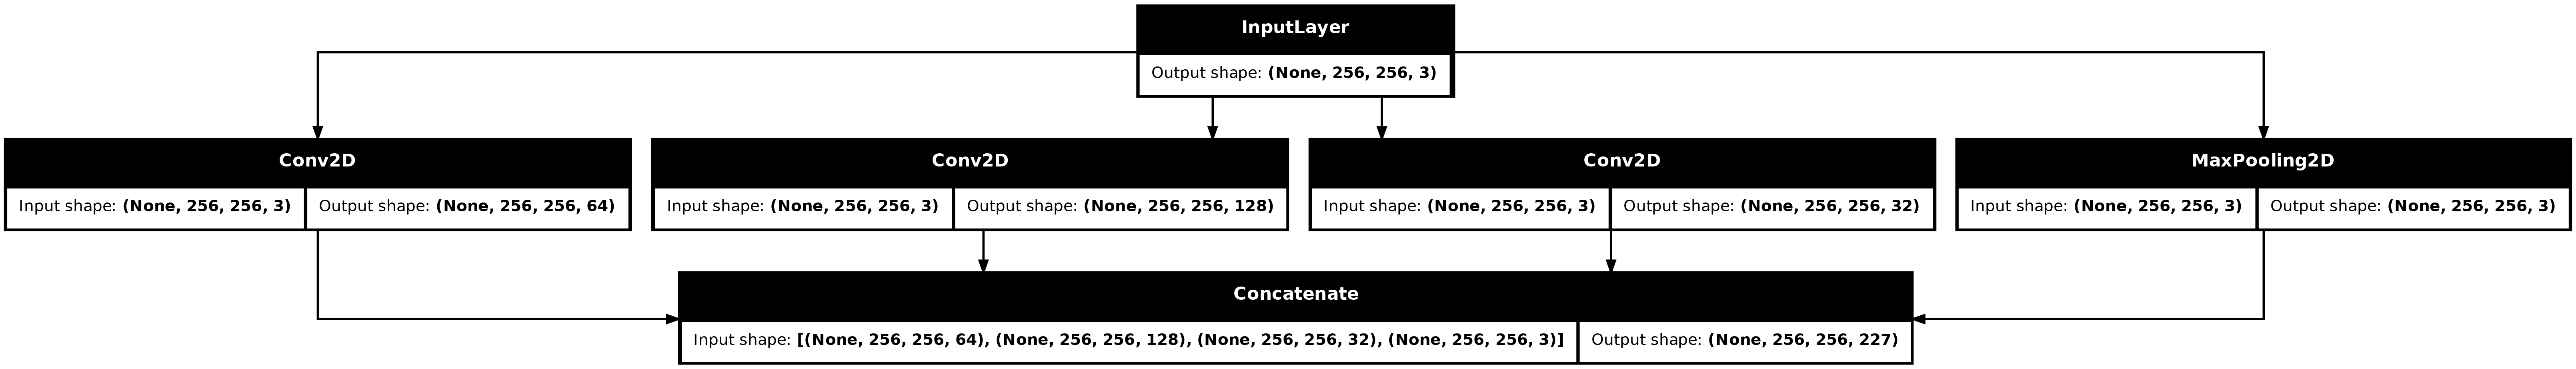

In [6]:
# 모델 구조 시각화하기
plot_model(model, show_shapes=True, to_file='output/naive_inception_module.png')